In [80]:
import pandas as pd
import zipfile

# Ruta local al archivo zip (ajústala si es diferente)
zip_path = 'C:/Users/evivas/Downloads/Datos_icfes_analitica.zip'

# Abrir el zip y leer el CSV dentro (ajusta el nombre del archivo si cambia)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('Datos_icfes.csv') as file:
        df = pd.read_csv(file)

df.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,partition_0
0,20172,CC,SB11201720219629,URBANO,NaN,A,ACADÉMICO,113433000021,113433000021,13,...,No,Si,A-,45.0,39.0,50,48,49,232,saber11-2017
1,20172,TI,SB11201720548913,RURAL,NaN,A,ACADÉMICO,241396000536,241396000536,41,...,No,Si,A-,36.0,50.0,45,48,49,235,saber11-2017
2,20172,TI,SB11201720208875,URBANO,N,A,TÉCNICO,176403000079,176403000079,76,...,Si,Si,A1,48.0,53.0,54,52,59,270,saber11-2017
3,20172,TI,SB11201720311306,URBANO,N,A,TÉCNICO,113468001038,113468001038,13,...,No,Si,A-,45.0,52.0,56,51,58,268,saber11-2017
4,20172,TI,SB11201720424646,RURAL,N,A,TÉCNICO/ACADÉMICO,273268001120,273268001120,73,...,Si,Si,A-,37.0,46.0,48,51,46,235,saber11-2017


In [81]:
#Conocer el nombre de las columnas 
df.columns
print(list(df.columns))

['periodo', 'estu_tipodocumento', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion', 'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'cole_sede_principal', 'estu_cod_depto_presentacion', 'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto', 'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside', 'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'd

In [82]:
#Eliminar columnas innecesarias, teniendo en cuenta las preguntas de negocio
df = df.drop(['estu_consecutivo', 'cole_area_ubicacion', 'cole_cod_dane_establecimiento','cole_cod_dane_sede','cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion','cole_codigo_icfes','cole_nombre_establecimiento', 'cole_nombre_sede', 'cole_sede_principal','estu_cod_depto_presentacion', 'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto','estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside','estu_fechanacimiento','estu_mcpio_presentacion', 'estu_mcpio_reside','partition_0','cole_mcpio_ubicacion','estu_estadoinvestigacion','estu_estudiante'], axis=1)

In [83]:
# Contar la cantidad de datos faltantes en cada columna 
datos_faltantes = df.isna().sum()

# Mostrar el resultado
print(datos_faltantes)

periodo                         0
estu_tipodocumento              0
cole_bilingue               79551
cole_calendario                 0
cole_caracter                8685
cole_depto_ubicacion            0
cole_genero                     0
cole_jornada                    0
cole_naturaleza                 0
estu_genero                     6
estu_nacionalidad               0
estu_pais_reside                0
estu_privado_libertad           0
fami_cuartoshogar            8823
fami_educacionmadre         24805
fami_educacionpadre         24806
fami_estratovivienda        27728
fami_personashogar          11614
fami_tieneautomovil         10530
fami_tienecomputador         9202
fami_tieneinternet          25707
fami_tienelavadora           8627
desemp_ingles                   7
punt_ingles                   123
punt_matematicas               11
punt_sociales_ciudadanas        0
punt_c_naturales                0
punt_lectura_critica            0
punt_global                     0
dtype: int64


In [84]:
import pandas as pd

# Valores unicos de cada columna 
for column in df.columns:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].unique())
    print('-' * 40)

Valores únicos en la columna 'periodo':
[20172 20171]
----------------------------------------
Valores únicos en la columna 'estu_tipodocumento':
['CC' 'TI' 'CR' 'CE' 'V' 'RC' 'PE' 'PC' 'NUI' 'NUIP']
----------------------------------------
Valores únicos en la columna 'cole_bilingue':
[nan 'N' 'S']
----------------------------------------
Valores únicos en la columna 'cole_calendario':
['A' 'B' 'OTRO']
----------------------------------------
Valores únicos en la columna 'cole_caracter':
['ACADÉMICO' 'TÉCNICO' 'TÉCNICO/ACADÉMICO' nan 'NO APLICA']
----------------------------------------
Valores únicos en la columna 'cole_depto_ubicacion':
['BOLIVAR' 'HUILA' 'VALLE' 'TOLIMA' 'ANTIOQUIA' 'LA GUAJIRA'
 'CUNDINAMARCA' 'CAQUETA' 'CESAR' 'BOYACA' 'BOGOTA' 'SUCRE' 'NARIÑO'
 'MAGDALENA' 'ATLANTICO' 'CAUCA' 'SANTANDER' 'CORDOBA' 'NORTE SANTANDER'
 'QUINDIO' 'RISARALDA' 'PUTUMAYO' 'GUAVIARE' 'META' 'GUAINIA' 'CASANARE'
 'CALDAS' 'CHOCO' 'VAUPES' 'ARAUCA' 'SAN ANDRES' 'VICHADA' 'AMAZONAS']
-----

In [85]:
# 1. Eliminar filas con 'cole_calendario' == "OTRO"
df = df[df['cole_calendario'] != "OTRO"]

In [86]:
# 2. Eliminar filas con 'cole_caracter' == "NO APLICA"
df = df[df['cole_caracter'] != "NO APLICA"]

In [87]:
# 3. Eliminar filas de la columna estu_genero cuyo valor NO sea 'F' o 'M'
df = df[df['estu_genero'].isin(['F', 'M'])]

In [88]:
# 4. Eliminar filas donde 'estu_pais_reside' no sea 'COLOMBIA'
df = df[df['estu_pais_reside'] == 'COLOMBIA']

In [89]:
# 5. En 'fami_educacionmadre', eliminar filas con valores no deseados
valores_no_madre = ['No sabe', 'No Aplica']
df = df[~df['fami_educacionmadre'].isin(valores_no_madre)]

In [90]:
# 6. En 'fami_educacionpadre', eliminar filas con valores no deseados
valores_no_padre = ['No Aplica', 'No sabe']
df = df[~df['fami_educacionpadre'].isin(valores_no_padre)]

In [91]:
import pandas as pd

# Corroborar que los valores unicos de cada columna sean acordes al nombre de esa columna 
for column in df.columns:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].unique())
    print('-' * 40)

Valores únicos en la columna 'periodo':
[20172 20171]
----------------------------------------
Valores únicos en la columna 'estu_tipodocumento':
['CC' 'TI' 'CR' 'CE' 'RC' 'PC' 'PE' 'V' 'NUI' 'NUIP']
----------------------------------------
Valores únicos en la columna 'cole_bilingue':
[nan 'N' 'S']
----------------------------------------
Valores únicos en la columna 'cole_calendario':
['A' 'B']
----------------------------------------
Valores únicos en la columna 'cole_caracter':
['ACADÉMICO' 'TÉCNICO' 'TÉCNICO/ACADÉMICO' nan]
----------------------------------------
Valores únicos en la columna 'cole_depto_ubicacion':
['BOLIVAR' 'HUILA' 'VALLE' 'TOLIMA' 'ANTIOQUIA' 'LA GUAJIRA'
 'CUNDINAMARCA' 'CAQUETA' 'CESAR' 'BOYACA' 'BOGOTA' 'NARIÑO' 'MAGDALENA'
 'CAUCA' 'SUCRE' 'SANTANDER' 'CORDOBA' 'NORTE SANTANDER' 'QUINDIO'
 'ATLANTICO' 'RISARALDA' 'PUTUMAYO' 'GUAVIARE' 'META' 'GUAINIA' 'CASANARE'
 'CALDAS' 'CHOCO' 'VAUPES' 'ARAUCA' 'SAN ANDRES' 'VICHADA' 'AMAZONAS']
------------------------

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# Lista de columnas relevantes para el análisis
columnas = [
    'fami_tienecomputador',   # Indicador de si la familia tiene computador
    'fami_tieneinternet',     # Indicador de si la familia tiene acceso a internet
    'fami_tienelavadora',     # Indicador de si la familia tiene lavadora
    'fami_tieneautomovil',
    "cole_depto_ubicacion",    # Indicador de si la familia tiene automóvil
    'punt_global'             # Puntaje global del estudiante
]

# Crear una copia del DataFrame original excluyendo las filas con valores nulos en las columnas seleccionadas
datos_factores_socio_economicos = df.dropna(subset=columnas).copy()

# Nota: esto asegura que los análisis posteriores no se vean afectados por datos faltantes

In [94]:
# Calcular el primer cuartil (Q1) del puntaje global
# Esto representa el valor por debajo del cual cae el 25% de los puntajes
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)

# Crear una nueva columna binaria llamada 'bajo_desempeno'
# Esta columna será True si el puntaje global del estudiante está en el 25% más bajo (es decir, <= Q1)
# y False en caso contrario. Esto nos permite identificar estudiantes con bajo rendimiento.
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] <= cuartil_25

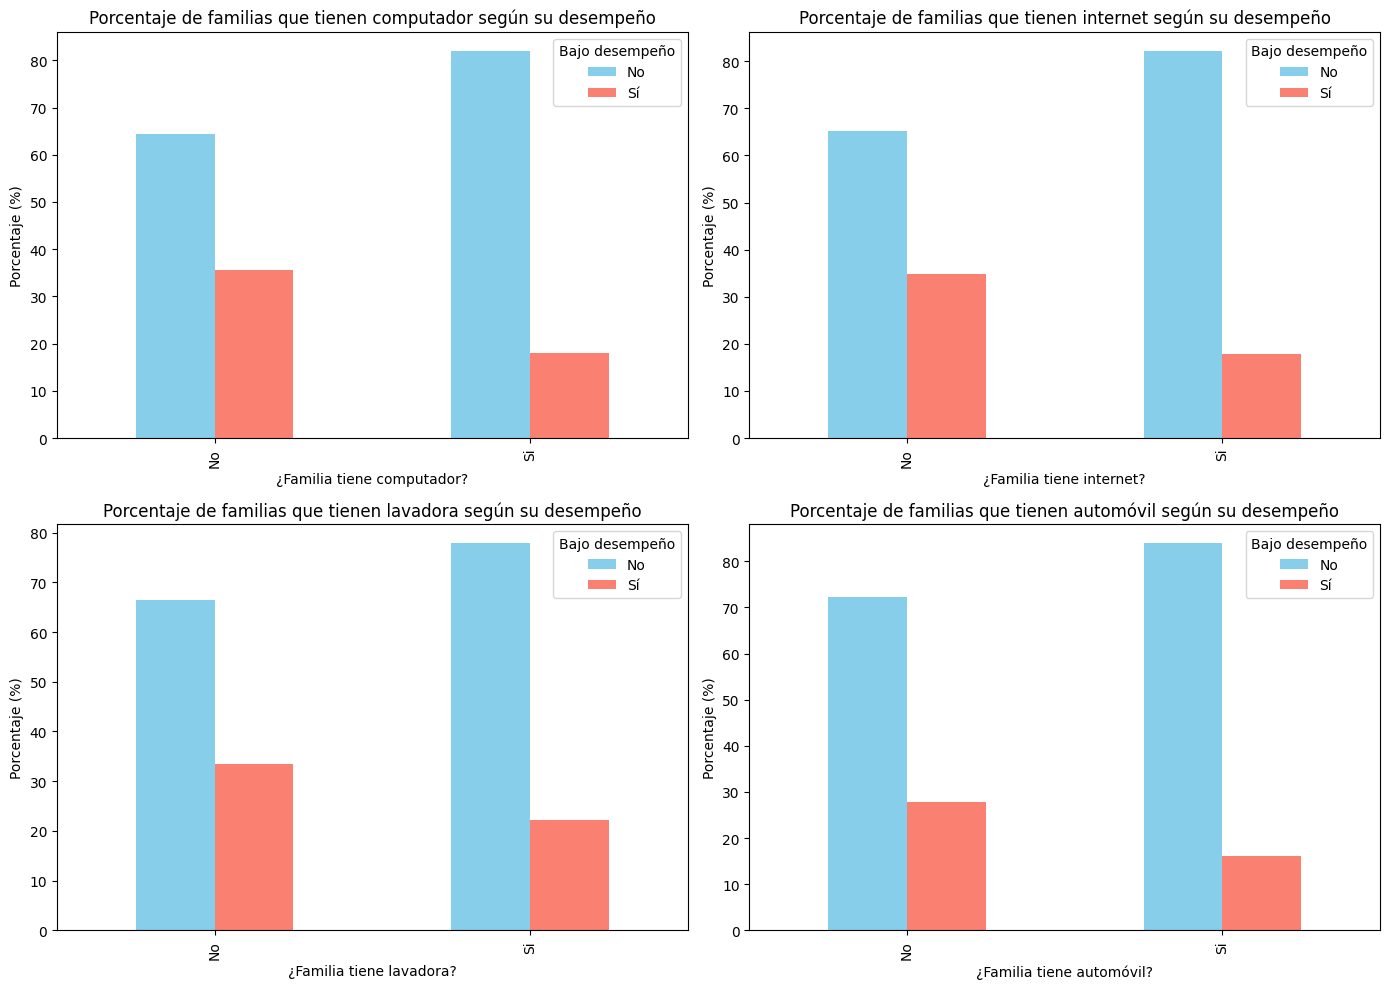

In [95]:
# Diccionario que asocia los nombres de las variables del DataFrame con etiquetas más descriptivas
nombres = {
    'fami_tienecomputador': 'computador',
    'fami_tieneinternet': 'internet',
    'fami_tienelavadora': 'lavadora',
    'fami_tieneautomovil': 'automóvil'
}

# Lista de variables socioeconómicas a analizar
variables = list(nombres.keys())

# Crear una figura con una cuadrícula de 2x2 subplots (una gráfica por variable)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las variables y sus respectivos ejes
for i, var in enumerate(variables):
    # Calcular la proporción de bajo desempeño (True/False) para cada categoría (tiene/no tiene)
    # Se multiplica por 100 para convertir a porcentaje
    prop = datos_factores_socio_economicos.groupby(var)['bajo_desempeno'] \
                .value_counts(normalize=True).unstack().fillna(0) * 100

    # Graficar el resultado como barras no apiladas (una por cada valor de bajo_desempeño)
    prop.plot(kind='bar', stacked=False, ax=axes[i], color=['skyblue', 'salmon'])

    # Personalizar títulos y etiquetas
    titulo = f"Porcentaje de familias que tienen {nombres[var]} según su desempeño"
    xlabel = f"¿Familia tiene {nombres[var]}?"

    axes[i].set_title(titulo)          # Título de la gráfica
    axes[i].set_ylabel('Porcentaje (%)')  # Etiqueta del eje Y
    axes[i].set_xlabel(xlabel)         # Etiqueta del eje X
    axes[i].legend(title='Bajo desempeño', labels=['No', 'Sí'])  # Leyenda con etiquetas personalizadas

# Ajustar el diseño para que no se superpongan los elementos
plt.tight_layout()
plt.show()


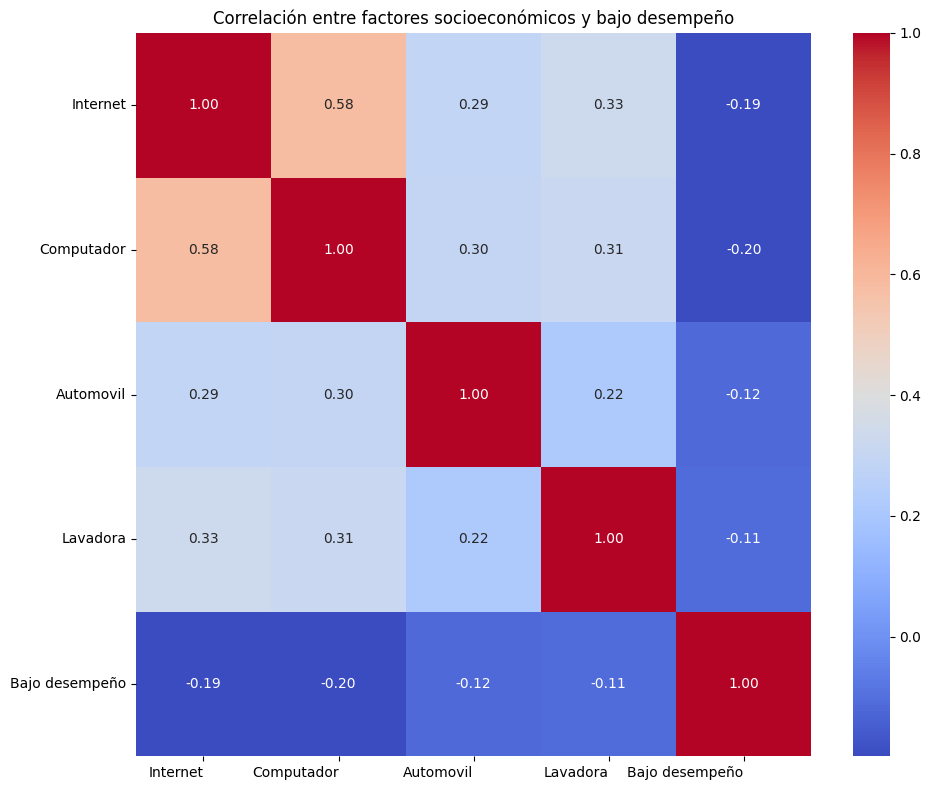

In [96]:
# Variables
variables = ['fami_tieneinternet', 'fami_tienecomputador', 'fami_tieneautomovil', 'fami_tienelavadora']
columnas_analisis = variables + ['punt_global']

# Diccionario para nombres personalizados
etiquetas = {
    'fami_tieneinternet': "Internet",
    'fami_tienecomputador': 'Computador',
    'fami_tieneautomovil': 'Automovil',
    'fami_tienelavadora': 'Lavadora',
    'bajo_desempeno': 'Bajo desempeño'
}

# Eliminar NaN
df_filtrado = df.dropna(subset=columnas_analisis).copy()

# Convertir variables categóricas a binarias (Sí=1, No=0)
for var in variables:
    df_filtrado[var] = df_filtrado[var].map({'Si': 1, 'No': 0})

# Calcular percentil 25
percentil_25 = df_filtrado['punt_global'].quantile(0.25)

# Crear variable binaria de bajo desempeño
df_filtrado['bajo_desempeno'] = (df_filtrado['punt_global'] <= percentil_25).astype(int)

# Variables para el mapa de calor
corr_vars = variables + ['bajo_desempeno']

# Calcular matriz de correlación
corr_matrix = df_filtrado[corr_vars].corr()

# Renombrar ejes con etiquetas descriptivas
corr_matrix.index = [etiquetas[var] for var in corr_matrix.index]
corr_matrix.columns = [etiquetas[var] for var in corr_matrix.columns]

# Gráfico de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre factores socioeconómicos y bajo desempeño')
plt.xticks(rotation=360, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



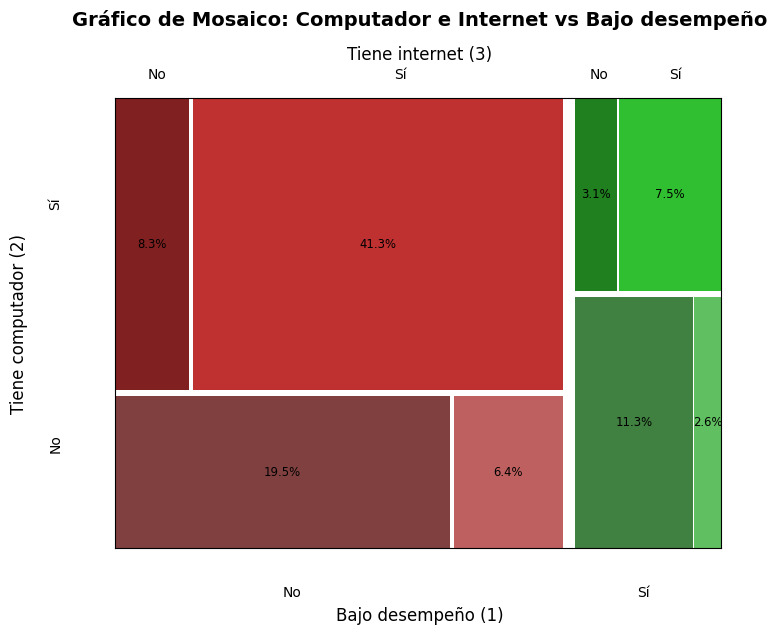

In [97]:
# Importar bibliotecas necesarias
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Calcular el cuartil 25 del puntaje global para definir bajo desempeño
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)

# Crear una nueva columna que indique si el estudiante está en bajo desempeño (True/False)
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25

# Definir las variables categóricas a cruzar
var1 = 'fami_tienecomputador'
var2 = 'fami_tieneinternet'

# Seleccionar solo las columnas necesarias y eliminar filas con valores nulos
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()

# Crear una columna auxiliar para contar ocurrencias
data['count'] = 1

# Agrupar los datos por las tres variables y contar ocurrencias
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()

# Convertir el índice múltiple del grupo en un diccionario con claves como tuplas de string
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}

# Crear un diccionario para traducir los valores booleanos a etiquetas legibles
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# Reemplazar las claves del diccionario con sus respectivas etiquetas en español
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# Calcular el total de observaciones para usarlo en el cálculo de porcentajes
total = sum(data_dict_etiquetado.values())

# Definir una función que devuelve una etiqueta con el porcentaje correspondiente para cada celda del gráfico
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]
    porcentaje = 100 * valor / total
    return f'{porcentaje:.1f}%'

# Crear el gráfico de mosaico con los datos etiquetados y mostrar los porcentajes en las celdas
fig, _ = mosaic(
    data_dict_etiquetado,     # Datos a graficar
    gap=0.02,                  # Espacio entre bloques
    labelizer=etiqueta_porcentaje,  # Función que etiqueta con porcentaje
    axes_label=False           # Oculta etiquetas de los ejes por defecto
)

# Añadir título principal encima del gráfico
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Computador e Internet vs Bajo desempeño', ha='center', fontsize=14, weight='bold')

# Añadir subtítulo encima del mosaico para indicar la variable 'Tiene internet'
fig.text(0.5, 1.05, 'Tiene internet (3)', ha='center', fontsize=12)

# Añadir etiquetas para cada nivel de la variable 'Tiene internet'
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)

# Añadir etiquetas al eje X para la variable 'Bajo desempeño'
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)

# Añadir etiquetas al eje Y para la variable 'Tiene computador'
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)
fig.text(-0.14, 0.5, 'Tiene computador (2)', va='center', fontsize=12, rotation=90)

# Ajustar automáticamente los elementos del gráfico para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


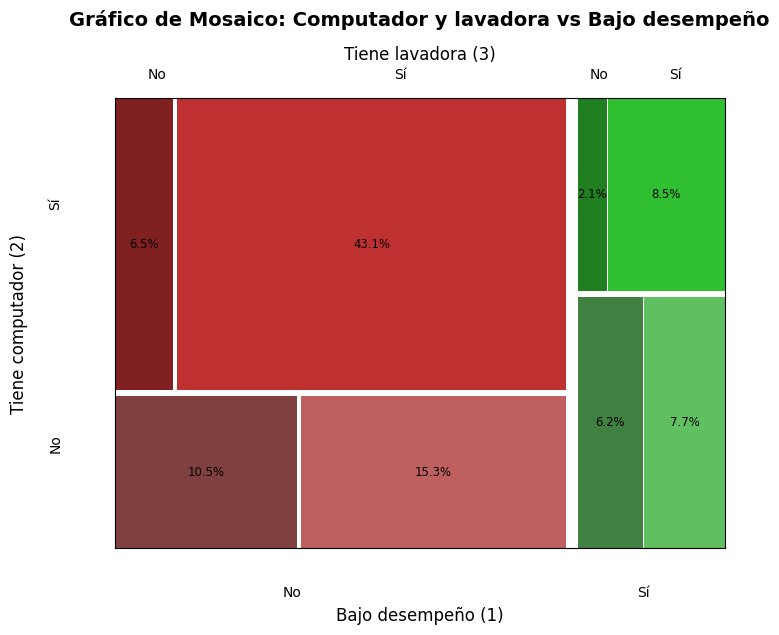

In [98]:
# --- Crear variable booleana para identificar bajo desempeño académico ---
# Se define como 'bajo desempeño' a quienes tienen puntaje global menor al percentil 25
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25

# --- Definir las variables categóricas a analizar ---
var1 = 'fami_tienecomputador'   # Variable que indica si el hogar tiene computador
var2 = 'fami_tienelavadora'     # Variable que indica si el hogar tiene lavadora

# --- Preparar los datos para el gráfico ---
# Seleccionamos solo las columnas relevantes y eliminamos filas con valores nulos
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()

# Añadir una columna auxiliar para contar registros por grupo
data['count'] = 1

# Agrupar los datos por las tres variables y contar observaciones
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()

# Convertir el índice multi-nivel en un diccionario con claves como tuplas de strings
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}

# --- Mapear valores booleanos a etiquetas legibles en español ---
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# Reemplazar los valores booleanos en el diccionario por etiquetas legibles
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# --- Calcular total de observaciones para usar en cálculo de porcentajes ---
total = sum(data_dict_etiquetado.values())

# --- Función para mostrar porcentaje en cada celda del gráfico ---
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]
    porcentaje = 100 * valor / total
    return f'{porcentaje:.1f}%'

# --- Crear el gráfico de mosaico con etiquetas porcentuales ---
fig, _ = mosaic(
    data_dict_etiquetado,     # Diccionario con los datos agrupados y etiquetados
    gap=0.02,                  # Espacio entre bloques
    labelizer=etiqueta_porcentaje,  # Función para mostrar porcentajes
    axes_label=False          # Desactivar etiquetas automáticas en ejes
)

# --- Añadir título principal del gráfico ---
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Computador y lavadora vs Bajo desempeño', ha='center', fontsize=14, weight='bold')

# --- Añadir etiquetas de la variable horizontal superior: "Tiene lavadora" ---
fig.text(0.5, 1.05, 'Tiene lavadora (3)', ha='center', fontsize=12)
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)

# --- Añadir etiquetas del eje X (bajo desempeño) ---
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)

# --- Añadir etiquetas del eje Y (tiene computador) ---
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)
fig.text(-0.14, 0.5, 'Tiene computador (2)', va='center', fontsize=12, rotation=90)

# --- Ajustar diseño y mostrar gráfico ---
plt.tight_layout()
plt.show()

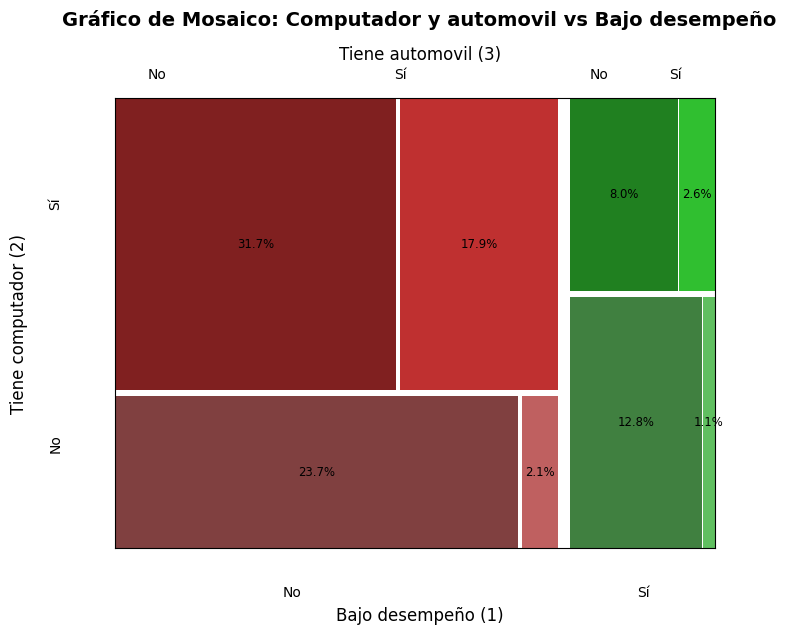

In [99]:
# --- Crear variable 'bajo_desempeno' basada en el cuartil 25 del puntaje global ---
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)  # Calcula el percentil 25 del puntaje global
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25  # Marca como True si está por debajo del cuartil 25

# --- Definir las variables a cruzar en el gráfico de mosaico ---
var1 = 'fami_tienecomputador'  # Variable 1: indica si tiene computador
var2 = 'fami_tieneautomovil'   # Variable 2: indica si tiene automóvil

# --- Preparar los datos para el gráfico de mosaico ---
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()  # Selecciona columnas y elimina filas con valores nulos
data['count'] = 1  # Crea una columna auxiliar para contar observaciones
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()  # Agrupa y suma el conteo

# --- Convertir los datos agrupados a un diccionario con claves como tuplas de strings ---
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}  # Convierte las claves booleanas a strings

# --- Mapeo de valores booleanos a etiquetas legibles para el gráfico ---
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# --- Aplicar el mapeo a las claves del diccionario para que aparezcan como etiquetas ---
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# --- Calcular el total de observaciones para luego calcular los porcentajes ---
total = sum(data_dict_etiquetado.values())

# --- Función para mostrar el porcentaje de cada grupo en el gráfico ---
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]  # Obtiene el valor del grupo
    porcentaje = 100 * valor / total  # Calcula el porcentaje
    return f'{porcentaje:.1f}%'  # Formato de texto

# --- Crear el gráfico de mosaico ---
fig, _ = mosaic(
    data_dict_etiquetado,     # Datos a graficar
    gap=0.02,                  # Espacio entre los bloques
    labelizer=etiqueta_porcentaje,  # Función para etiquetar cada celda
    axes_label=False          # Ocultar ejes predeterminados
)

# --- Agregar título principal encima del gráfico ---
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Computador y automovil vs Bajo desempeño', 
         ha='center', fontsize=14, weight='bold')

# --- Agregar etiquetas encima del mosaico para la variable "Tiene automóvil" ---
fig.text(0.5, 1.05, 'Tiene automovil (3)', ha='center', fontsize=12)  # Subtítulo de la variable horizontal
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)  # Etiqueta izquierda
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)  # Etiqueta centro-izquierda
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)  # Etiqueta centro-derecha
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)   # Etiqueta derecha

# --- Etiquetas del eje X para la variable "Bajo desempeño" ---
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)   # Etiqueta izquierda
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)  # Etiqueta derecha
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)  # Subtítulo del eje X

# --- Etiquetas del eje Y para la variable "Tiene computador" ---
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)   # Etiqueta inferior
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)   # Etiqueta superior
fig.text(-0.14, 0.5, 'Tiene computador (2)', va='center', fontsize=12, rotation=90)  # Subtítulo del eje Y

# --- Ajustar los espacios del gráfico automáticamente ---
plt.tight_layout()

# --- Mostrar el gráfico ---
plt.show()


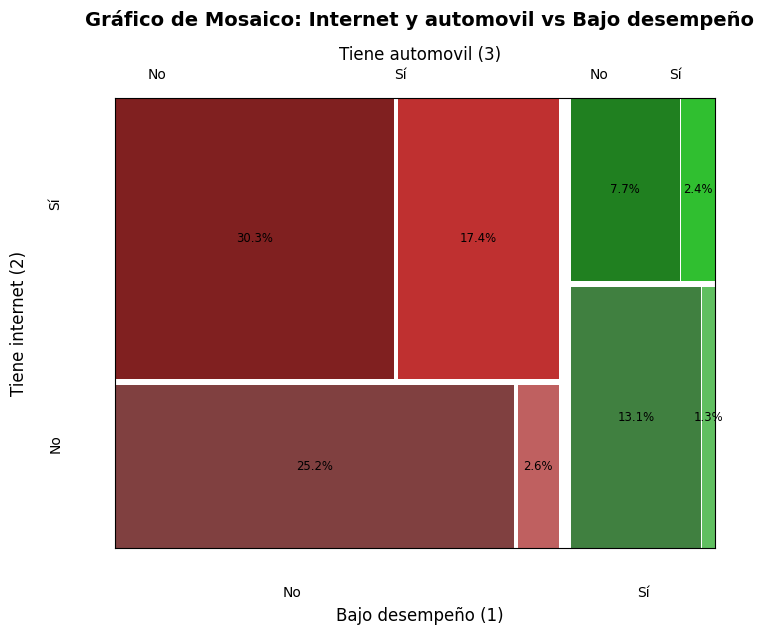

In [100]:
# Crear variable 'bajo_desempeno' según el cuartil 25 de 'punt_global'
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25

# Definir las variables que se quieren cruzar en el gráfico
var1 = 'fami_tieneinternet'    # Eje Y: si tiene internet
var2 = 'fami_tieneautomovil'   # División superior: si tiene automóvil

# Seleccionar las variables relevantes y eliminar filas con valores faltantes
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()

# Crear columna auxiliar para contar observaciones
data['count'] = 1

# Agrupar por las tres variables y contar la frecuencia de cada combinación
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()

# Convertir el índice del groupby a tuplas de strings para usar en el gráfico
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}

# Diccionario para mapear valores booleanos a etiquetas legibles en español
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# Aplicar el mapeo a los valores del diccionario
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# Calcular el total de observaciones para obtener los porcentajes
total = sum(data_dict_etiquetado.values())

# Función que genera la etiqueta de porcentaje para cada celda del gráfico
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]
    porcentaje = 100 * valor / total
    return f'{porcentaje:.1f}%'

# Crear el gráfico de mosaico usando los datos procesados y etiquetas
fig, _ = mosaic(
    data_dict_etiquetado,
    gap=0.02,                     # Espacio entre celdas
    labelizer=etiqueta_porcentaje,  # Función para mostrar porcentaje
    axes_label=False             # Ocultar etiquetas automáticas de ejes
)

# --- TÍTULO PRINCIPAL ---
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Internet y automovil vs Bajo desempeño', 
         ha='center', fontsize=14, weight='bold')

# --- TÍTULO SUPERIOR y subdivisiones para el eje superior (automóvil) ---
fig.text(0.5, 1.05, 'Tiene automovil (3)', ha='center', fontsize=12)
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)

# --- EJE X: Bajo desempeño (sí/no) ---
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)

# --- EJE Y: Tiene internet (sí/no) ---
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)
fig.text(-0.14, 0.5, 'Tiene internet (2)', va='center', fontsize=12, rotation=90)

# Ajuste automático de la figura para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico final
plt.show()


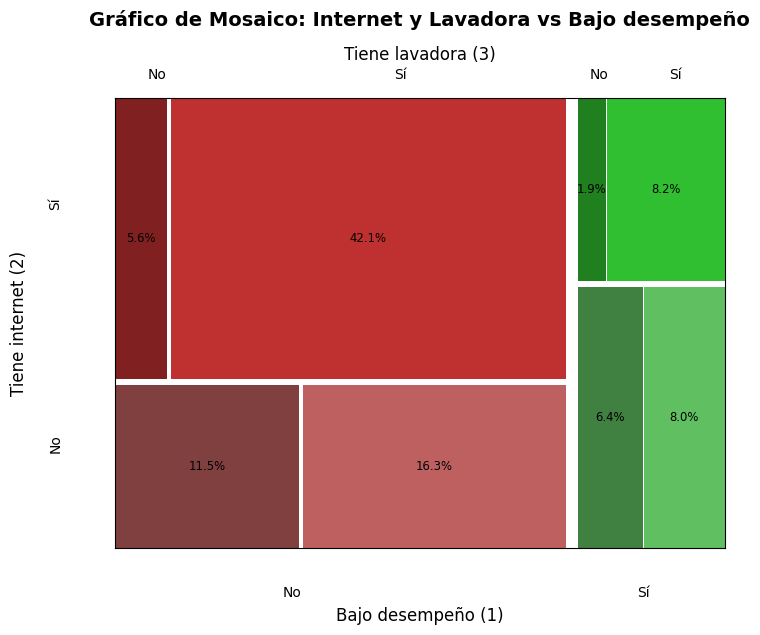

In [101]:
# --- CREACIÓN DE LA VARIABLE DE INTERÉS ---

# Calcular el cuartil 25 de la variable 'punt_global'
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)

# Crear variable booleana 'bajo_desempeno' que indica si un estudiante tiene desempeño bajo (puntaje menor al cuartil 25)
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25

# --- DEFINICIÓN DE VARIABLES A CRUZAR ---

# Variables socioeconómicas de interés
var1 = 'fami_tieneinternet'   # Indica si el hogar tiene conexión a internet
var2 = 'fami_tienelavadora'   # Indica si el hogar tiene lavadora

# --- PREPARACIÓN DE LOS DATOS ---

# Seleccionar las columnas relevantes y eliminar filas con valores faltantes
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()

# Crear una columna auxiliar para contar observaciones
data['count'] = 1

# Agrupar por las combinaciones de variables y sumar la cuenta
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()

# Convertir los resultados agrupados en un diccionario con claves como tuplas de strings
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}

# --- ETIQUETADO DE VALORES BOOLEANOS ---

# Mapeo de valores booleanos a etiquetas legibles para el gráfico
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# Reemplazar claves en el diccionario con etiquetas legibles (Sí/No en lugar de True/False)
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# Calcular el total de observaciones para convertir los conteos a porcentajes
total = sum(data_dict_etiquetado.values())

# --- DEFINICIÓN DE FUNCIONES AUXILIARES ---

# Función para etiquetar cada celda del gráfico con su respectivo porcentaje
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]
    porcentaje = 100 * valor / total
    return f'{porcentaje:.1f}%'

# --- CREACIÓN DEL GRÁFICO DE MOSAICO ---

# Generar gráfico de mosaico con las proporciones y etiquetas
fig, _ = mosaic(
    data_dict_etiquetado,      # Diccionario con datos etiquetados
    gap=0.02,                  # Espacio entre las celdas del mosaico
    labelizer=etiqueta_porcentaje,  # Función para mostrar porcentajes
    axes_label=False           # Desactivar etiquetas automáticas de ejes
)

# --- PERSONALIZACIÓN DEL GRÁFICO ---

# Título principal del gráfico
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Internet y Lavadora vs Bajo desempeño', ha='center', fontsize=14, weight='bold')

# Subtítulo sobre el mosaico indicando la variable horizontal secundaria
fig.text(0.5, 1.05, 'Tiene lavadora (3)', ha='center', fontsize=12)

# Etiquetas sobre las subdivisiones horizontales (valores de var2 según var1 y desempeño)
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)

# Etiquetas del eje X: categorías de 'bajo desempeño'
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)

# Etiquetas del eje Y: categorías de 'fami_tieneinternet'
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)
fig.text(-0.14, 0.5, 'Tiene internet (2)', va='center', fontsize=12, rotation=90)

# Ajustar diseño del gráfico para evitar sobreposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


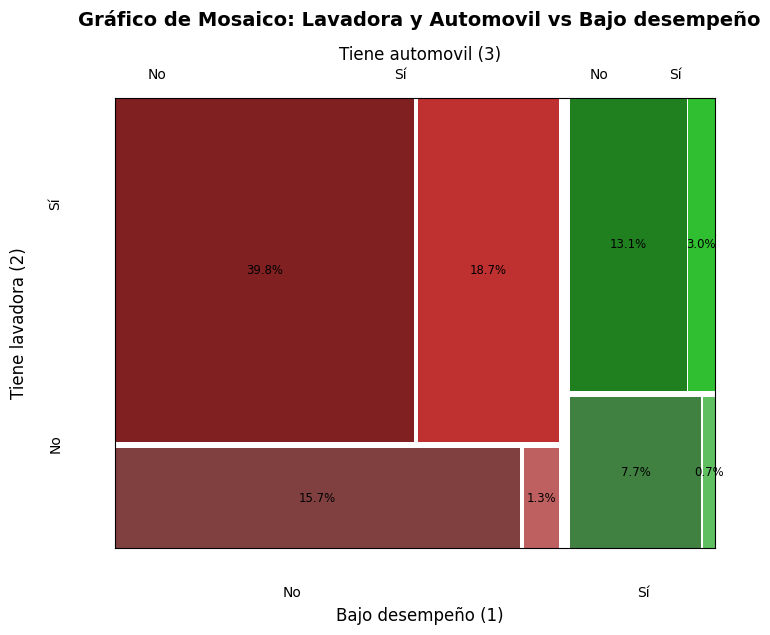

In [102]:
# Calcular el cuartil 25 de la puntuación global
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)

# Crear una nueva variable booleana que indica si el estudiante está en el cuartil inferior (bajo desempeño)
datos_factores_socio_economicos['bajo_desempeno'] = datos_factores_socio_economicos['punt_global'] < cuartil_25

# Variables del hogar que se cruzarán con la variable de bajo desempeño
var1 = 'fami_tienelavadora'
var2 = 'fami_tieneautomovil'

# Preparar los datos: seleccionar las variables necesarias y eliminar filas con valores nulos
data = datos_factores_socio_economicos[[var1, var2, 'bajo_desempeno']].dropna()

# Agregar una columna auxiliar para contar ocurrencias
data['count'] = 1

# Agrupar por combinación de variables y contar las ocurrencias
grouped = data.groupby(['bajo_desempeno', var1, var2])['count'].sum()

# Convertir el resultado agrupado en un diccionario con claves como tuplas de strings
data_dict = {(str(k[0]), str(k[1]), str(k[2])): v for k, v in grouped.items()}

# Diccionario para mapear valores booleanos a etiquetas más legibles
etiquetas_mapeo = {
    'True': 'Sí',
    'False': 'No'
}

# Reemplazar valores booleanos por etiquetas legibles en las claves del diccionario
data_dict_etiquetado = {
    (etiquetas_mapeo.get(k[0], k[0]), etiquetas_mapeo.get(k[1], k[1]), etiquetas_mapeo.get(k[2], k[2])): v
    for k, v in data_dict.items()
}

# Calcular el total de observaciones para luego obtener los porcentajes
total = sum(data_dict_etiquetado.values())

# Función que genera una etiqueta con el porcentaje correspondiente a cada celda del gráfico
def etiqueta_porcentaje(k):
    valor = data_dict_etiquetado[k]
    porcentaje = 100 * valor / total
    return f'{porcentaje:.1f}%'

# Crear el gráfico de mosaico con los datos etiquetados y porcentajes
fig, _ = mosaic(
    data_dict_etiquetado,
    gap=0.02,                  # Espacio entre bloques del gráfico
    labelizer=etiqueta_porcentaje,  # Función para mostrar el porcentaje
    axes_label=False           # Oculta etiquetas automáticas de los ejes
)

# --- TÍTULO PRINCIPAL (encima de todo el gráfico) ---
fig.text(0.5, 1.12, 'Gráfico de Mosaico: Lavadora y Automovil vs Bajo desempeño',
         ha='center', fontsize=14, weight='bold')

# --- TÍTULO Y SUBDIVISIONES SUPERIORES: "Tiene automovil" ---
fig.text(0.5, 1.05, 'Tiene automovil (3)', ha='center', fontsize=12)
fig.text(0.09, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.47, 1.01, 'Sí', ha='center', fontsize=10)
fig.text(0.78, 1.01, 'No', ha='center', fontsize=10)
fig.text(0.9, 1.01, 'Sí', ha='center', fontsize=10)

# --- EJE X (Bajo desempeño) ---
fig.text(0.3, -0.07, 'No', ha='center', fontsize=10)
fig.text(0.85, -0.07, 'Sí', ha='center', fontsize=10)
fig.text(0.5, -0.12, 'Bajo desempeño (1)', ha='center', fontsize=12)

# --- EJE Y (Tiene lavadora) ---
fig.text(-0.08, 0.25, 'No', va='center', fontsize=10, rotation=90)
fig.text(-0.08, 0.75, 'Sí', va='center', fontsize=10, rotation=90)
fig.text(-0.14, 0.5, 'Tiene lavadora (2)', va='center', fontsize=12, rotation=90)

# Ajustar los márgenes para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


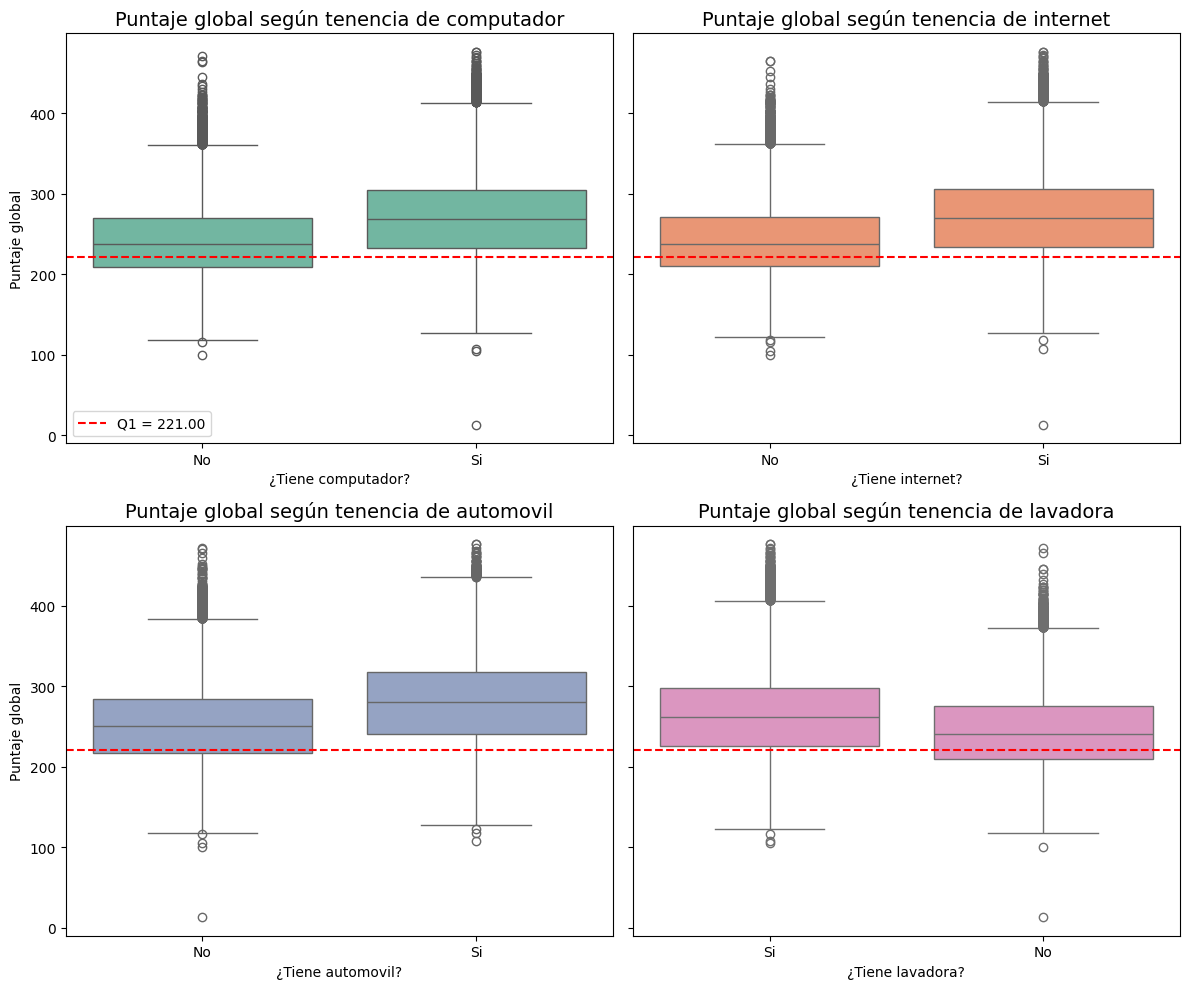

In [103]:
# Lista de variables socioeconómicas a analizar (booleans que indican si el hogar posee ciertos bienes)
factores = ['fami_tienecomputador', 'fami_tieneinternet', "fami_tieneautomovil", "fami_tienelavadora"]

# Calcular el primer cuartil (25%) del puntaje global para usarlo como referencia en los gráficos
cuartil_25 = datos_factores_socio_economicos['punt_global'].quantile(0.25)

# Crear una figura con 4 subplots (2 filas y 2 columnas), compartiendo eje Y para facilitar la comparación
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Aplanar el arreglo de ejes para poder iterar fácilmente sobre ellos
axes = axes.flatten()

# Seleccionar una paleta de colores con 4 tonos para diferenciar los gráficos
paleta = sns.color_palette("Set2", len(factores))

# Iterar sobre cada variable y su respectivo subplot
for i, (ax, var) in enumerate(zip(axes, factores)):
    # Generar un nombre más amigable quitando el prefijo "fami_tiene"
    nombre_amigable = var.replace("fami_tiene", "")
    
    # Dibujar el boxplot de puntaje global según si tiene o no el bien correspondiente
    sns.boxplot(x=var, y='punt_global', data=datos_factores_socio_economicos, ax=ax, color=paleta[i])
    
    # Dibujar una línea horizontal indicando el cuartil 25 del puntaje global
    ax.axhline(cuartil_25, color='red', linestyle='--', label=f'Q1 = {cuartil_25:.2f}')
    
    # Agregar título personalizado al subplot
    ax.set_title(f'Puntaje global según tenencia de {nombre_amigable}', fontsize=14)
    
    # Etiquetar el eje X con un mensaje claro
    ax.set_xlabel(f'¿Tiene {nombre_amigable}?')
    
    # Etiquetar el eje Y solo en la primera columna (para ahorrar espacio)
    if i % 2 == 0:
        ax.set_ylabel('Puntaje global')
    else:
        ax.set_ylabel('')

    # Incluir la leyenda solo en el primer gráfico
    if i == 0:
        ax.legend()

# Ajustar diseño para evitar solapamiento de textos
plt.tight_layout()

# Mostrar la figura final con todos los boxplots
plt.show()


C:\Users\evivas\AppData\Local\Temp\ipykernel_4300\3618463764.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


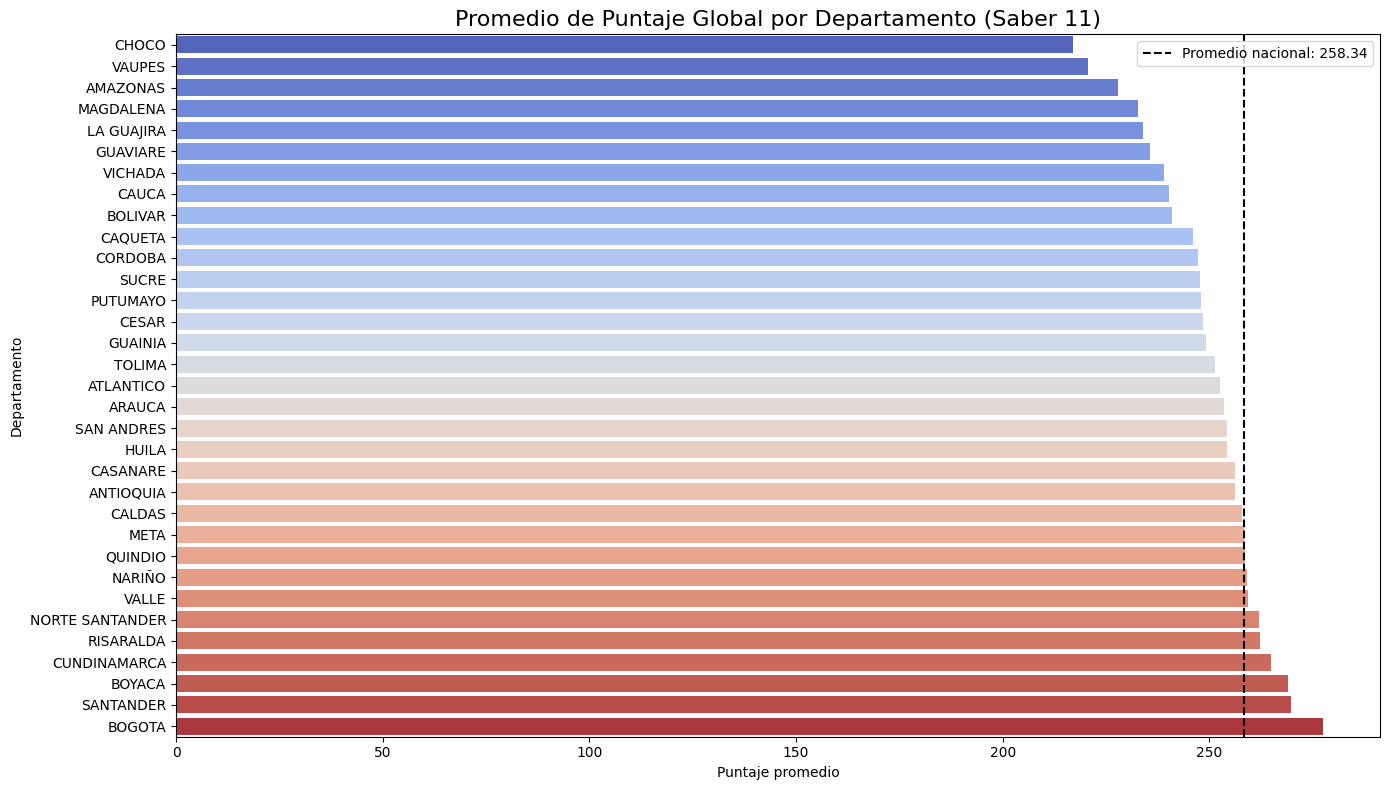

In [104]:
# --- 1. CÁLCULO DE PROMEDIOS ---
# Promedio nacional (media general de puntajes)
promedio_nacional = datos_factores_socio_economicos['punt_global'].mean()

# Promedio por departamento
promedios_depto = datos_factores_socio_economicos.groupby('cole_depto_ubicacion')['punt_global'].mean().sort_values()

# --- 2. GRAFICAR ---
plt.figure(figsize=(14, 8))
sns.barplot(
    x=promedios_depto.values,
    y=promedios_depto.index,
    palette='coolwarm'
)

# Línea vertical con el promedio nacional
plt.axvline(promedio_nacional, color='black', linestyle='--', linewidth=1.5, label=f'Promedio nacional: {promedio_nacional:.2f}')

# --- 3. ETIQUETAS Y FORMATO ---
plt.title('Promedio de Puntaje Global por Departamento (Saber 11)', fontsize=16)
plt.xlabel('Puntaje promedio')
plt.ylabel('Departamento')
plt.legend()
plt.tight_layout()

# --- 4. MOSTRAR ---
plt.show()


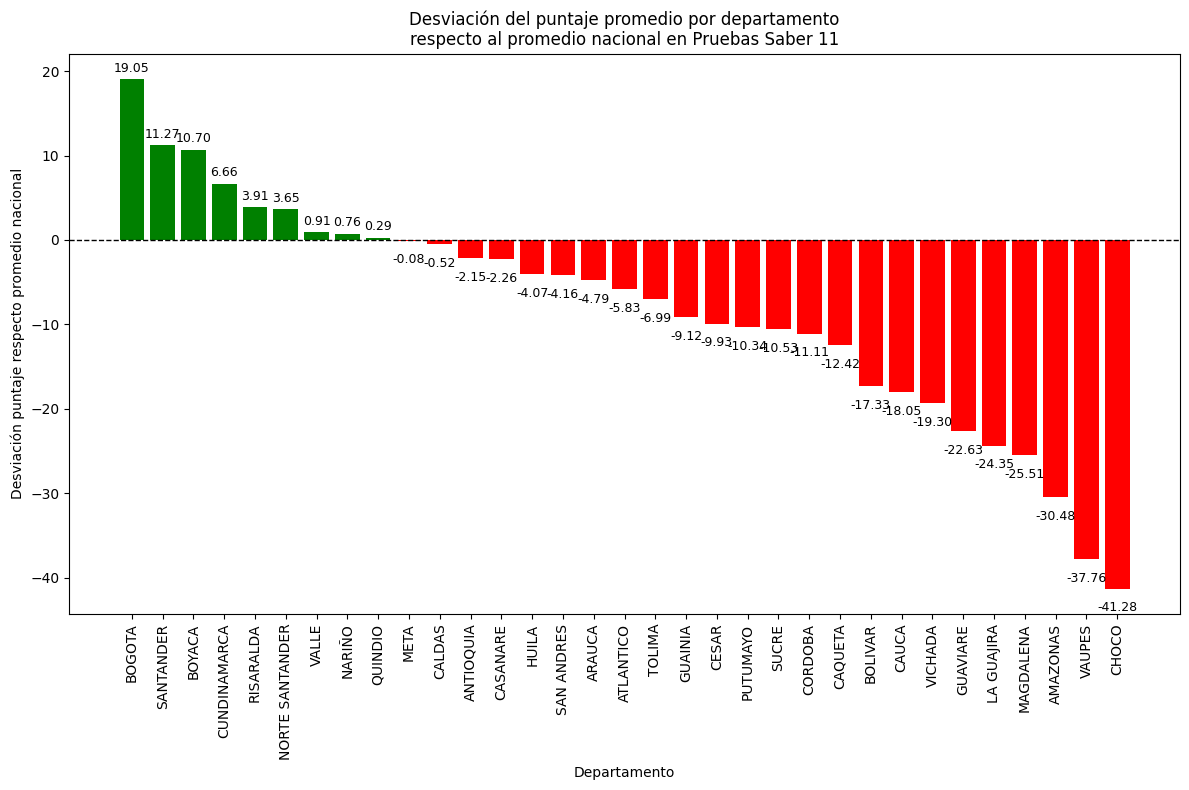

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Quitar filas con valores nulos en las columnas importantes
df = datos_factores_socio_economicos.dropna(subset=['cole_depto_ubicacion', 'punt_global'])

# 2. Calcular puntaje promedio por departamento
promedios_depto = df.groupby('cole_depto_ubicacion')['punt_global'].mean().reset_index()

# 3. Calcular promedio nacional
promedio_nacional = df['punt_global'].mean()

# 4. Calcular desviación respecto al promedio nacional
promedios_depto['desviacion'] = promedios_depto['punt_global'] - promedio_nacional

# 5. Ordenar departamentos por desviación
promedios_depto = promedios_depto.sort_values('desviacion', ascending=False)

# 6. Colores: verde si está por encima, rojo si está por debajo
promedios_depto['color'] = promedios_depto['desviacion'].apply(lambda x: 'green' if x > 0 else 'red')

# 7. Graficar
plt.figure(figsize=(12,8))
bars = plt.bar(promedios_depto['cole_depto_ubicacion'], promedios_depto['desviacion'], color=promedios_depto['color'])

# Línea horizontal en cero (promedio nacional)
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Etiquetas y título
plt.xticks(rotation=90)
plt.xlabel('Departamento')
plt.ylabel('Desviación puntaje respecto promedio nacional')
plt.title('Desviación del puntaje promedio por departamento\nrespecto al promedio nacional en Pruebas Saber 11')

# Agregar valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.5 if yval > 0 else -1.5), f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el GeoJSON de Colombia (departamentos)
colombia = gpd.read_file('gadm41_COL_1.json')


In [124]:
import unicodedata

In [125]:
# 2. Crear función para normalizar nombres (MAYÚSCULAS y sin tildes)
def normalizar_nombre(nombre):
    # Quitar tildes y caracteres especiales
    nombre = unicodedata.normalize('NFKD', nombre).encode('ASCII', 'ignore').decode('ASCII')
    return nombre.upper()

# 3. Aplicar normalización a los nombres en el GeoJSON
colombia['NOMBRE_NORMALIZADO'] = colombia['NAME_1'].apply(normalizar_nombre)

In [126]:
# 5. Calcular promedios por departamento
df_promedios = datos_factores_socio_economicos.groupby('cole_depto_ubicacion')['punt_global'].mean().reset_index()

In [127]:
df_promedios

,cole_depto_ubicacion,punt_global
0,AMAZONAS,227.868163
1,ANTIOQUIA,256.191357
2,ARAUCA,253.553598
3,ATLANTICO,252.518144
4,BOGOTA,277.395027
5,BOLIVAR,241.011728
6,BOYACA,269.045382
7,CALDAS,257.823683
8,CAQUETA,245.921217
9,CASANARE,256.086525


In [ ]:
# Diccionario de mapeo 
mapeo_nombres = {
    'AMAZONAS': 'Amazonas',
    'ANTIOQUIA': 'Antioquia',
    'ARAUCA': 'Arauca',
    'ATLANTICO': 'Atlántico',
    'BOGOTA D.C.': 'BogotáD.C.',
    'BOLIVAR': 'Bolívar',
    'BOYACA': 'Boyacá',
    'CALDAS': 'Caldas',
    'CAQUETA': 'Caquetá',
    'CASANARE': 'Casanare',
    'CAUCA': 'Cauca',
    'CESAR': 'Cesar',
    'CHOCO': 'Chocó',
    'CORDOBA': 'Córdoba',
    'CUNDINAMARCA': 'Cundinamarca',
    'GUAINIA': 'Guainía',
    'GUAVIARE': 'Guaviare',
    'HUILA': 'Huila',
    'LA GUAJIRA': 'LaGuajira',
    'MAGDALENA': 'Magdalena',
    'META': 'Meta',
    'NARIÑO': 'Nariño',
    'NORTE SANTANDER': 'NortedeSantander',
    'PUTUMAYO': 'Putumayo',
    'QUINDIO': 'Quindío',
    'RISARALDA': 'Risaralda',
    'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA': 'SanAndrésyProvidencia',
    'SANTANDER': 'Santander',
    'SUCRE': 'Sucre',
    'TOLIMA': 'Tolima',
    'VALLE DEL CAUCA': 'ValledelCauca',
    'VAUPES': 'Vaupés',
    'VICHADA': 'Vichada'
}

# Aplicar el mapeo al DataFrame
df_promedios['NOMBRE_GEOJSON'] = df_promedios['cole_depto_ubicacion'].map(mapeo_nombres)

# Verificar si hay algún nombre no mapeado
print("Nombres sin mapear:", df_promedios[df_promedios['NOMBRE_GEOJSON'].isna()]['cole_depto_ubicacion'].unique())

# Hacer el merge con el nombre correcto
colombia = colombia.merge(
    df_promedios,
    left_on='NAME_1',
    right_on='NOMBRE_GEOJSON',
    how='left'
)

# Verificar el resultado del merge
print("\nVerificación post-merge:")
print("Registros con datos:", colombia['punt_global'].notna().sum())
print(colombia[['NAME_1', 'punt_global']].head(10))

Nombres sin mapear: ['BOGOTA' 'SAN ANDRES' 'VALLE']

Verificación post-merge:
Registros con datos: 30
       NAME_1  punt_global
0    Amazonas   227.868163
1   Antioquia   256.191357
2      Arauca   253.553598
3   Atlántico   252.518144
4  BogotáD.C.          NaN
5     Bolívar   241.011728
6      Boyacá   269.045382
7      Caldas   257.823683
8     Caquetá   245.921217
9    Casanare   256.086525


In [129]:
# 1. Verificación final de datos (crucial)
print("\nResumen de datos:")
print(f"Total departamentos: {len(colombia)}")
print(f"Departamentos con datos: {colombia['punt_global'].notna().sum()}")
print(f"Valor mínimo: {colombia['punt_global'].min():.2f}")
print(f"Valor máximo: {colombia['punt_global'].max():.2f}")


Resumen de datos:
Total departamentos: 33
Departamentos con datos: 30
Valor mínimo: 217.07
Valor máximo: 269.62


In [135]:
# Verifica el número de coincidencias
print(f"Registros originales en GeoJSON: {len(colombia)}")
print(f"Registros con merge exitoso: {colombia['punt_global'].notna().sum()}")
print(f"Porcentaje de éxito: {colombia['punt_global'].notna().mean()*100:.2f}%")

Registros originales en GeoJSON: 33
Registros con merge exitoso: 30
Porcentaje de éxito: 90.91%


In [ ]:
# Asignar valor promedio general a los faltantes
if colombia['punt_global'].isna().any():
    promedio_general = df_promedios['punt_global'].mean()
    colombia['punt_global'] = colombia['punt_global'].fillna(promedio_general)
    print(f"\nAsignado valor promedio ({promedio_general:.2f}) a departamentos faltantes")



Asignado valor promedio (250.05) a departamentos faltantes


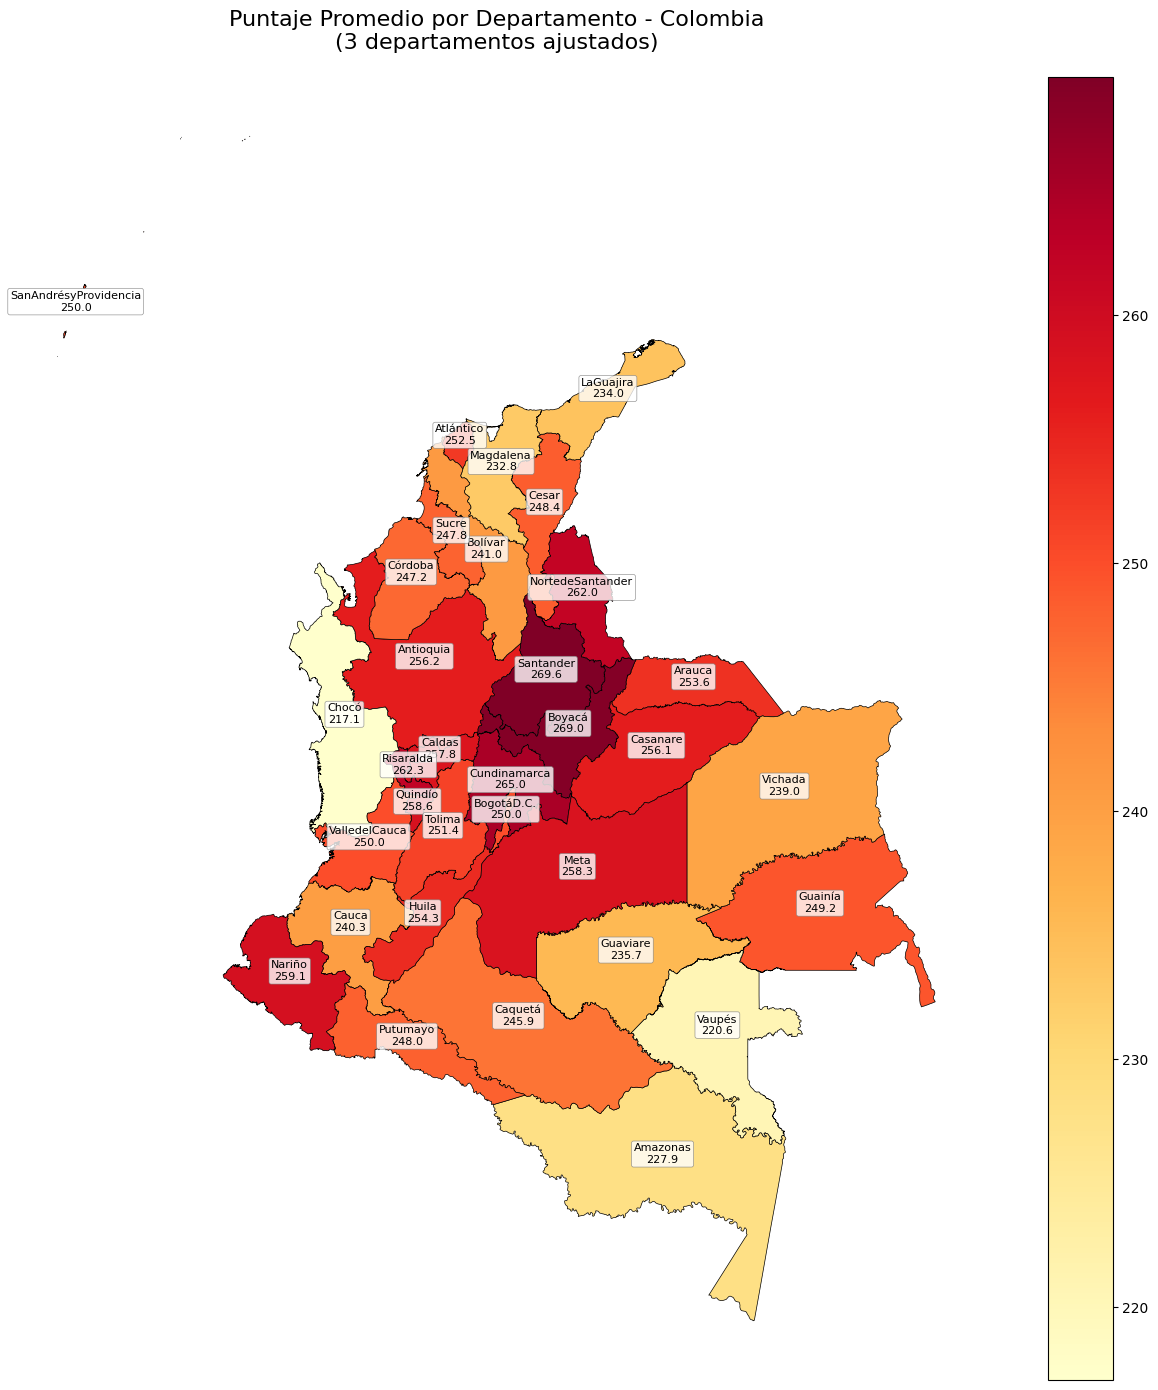

In [138]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Configurar colores
cmap = plt.get_cmap('YlOrRd').copy()
cmap.set_under('lightgrey')  # Color para valores faltantes (si usas -1)

fig, ax = plt.subplots(figsize=(14, 14))

# Crear mapa
colombia.plot(
    column='punt_global',
    cmap=cmap,
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey', 'hatch': '///', 'label': 'Sin datos'}
)

# Añadir etiquetas
for idx, row in colombia.iterrows():
    label = f"{row['NAME_1']}\n{row['punt_global']:.1f}" if not pd.isna(row['punt_global']) else row['NAME_1']
    ax.annotate(
        text=label,
        xy=row['geometry'].centroid.coords[0],
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5, alpha=0.8)
    )

# Personalización
ax.set_title('Puntaje Promedio por Departamento - Colombia\n(3 departamentos ajustados)', 
             fontsize=16, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('mapa_final_ajustado.png', dpi=300, bbox_inches='tight')
plt.show()